# Ensemble Techniques

## CONTEXT: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt to retain customers. The end goal is to develop focused customer retention programs.

### DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. 
The data set includes information about:
<li> <b>Customers who left within the last month</b> – the column is called Churn</li>
<li> <b>Services that each customer has signed up for </b> – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies </li>
<li> <b>Customer account information</b> – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges </li>
<li> <b>Demographic info about customers</b> – gender, age range, and if they have partners and dependents </li>

### PROJECT OBJECTIVE: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention


## • STEPS AND TASK

### 1. Data Understanding & Exploration:

#### 1.A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
#### 1.B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
tc1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
tc2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
tc1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [4]:
tc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [5]:
tc1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [6]:
tc2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
tc1.shape

(7043, 10)

In [8]:
tc2.shape

(7043, 12)

#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [9]:
tc=pd.merge(tc1,tc2,on='customerID')

In [10]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [12]:
for col in tc.columns:
    if  (col not in tc1.columns and col not in tc2.columns):
        print("Columns are missing")
else:
        print("All Columns incorporated")

All Columns incorporated


#### 2. Data Cleaning & Analysis: [15 Marks]

#### 2.A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [13]:
tc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
tc.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Observations
<li>  <b> customerID </b> Column doesnt contribute to model bulding and can be removed </li>
<li>The <b> "ToatlCharges"</b> column seems to be "Object" type, however it needs to be Float. This feature needs to be investigated for any data discrepncies or unwanted/missing data.</li>


In [17]:
#Dropping "customerID" column

tc.drop(['customerID'], axis='columns', inplace=True)
tc.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
#Investigating "TotalCharges" column
tc['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [19]:
#Identifying rows with Non numeric "TotalCharges"columns.
tc[pd.to_numeric(tc.TotalCharges, errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### Observations
<li> <b>"ToatlCharges"</b> column having 11 rows with empty space character which represents an missing value.</li>
<li> When compared to 7043 total record these 11 records could be removed</li>


In [20]:
tc= tc.replace(' ',np.nan)
tc.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
tc.dropna(inplace=True)
tc.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
tc.shape

(7032, 20)

In [23]:
tc['TotalCharges'].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

#### 2.B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]

In [24]:
tc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###### Tenure, MonthlyCharges,TotalCharges are variables having continous values hence will be converted to Float type.

In [25]:
tc.tenure = tc.tenure.astype(float)
tc.MonthlyCharges = tc.MonthlyCharges.astype(float)
tc.TotalCharges = tc.TotalCharges.astype(float)


In [26]:
tc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### 2.C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

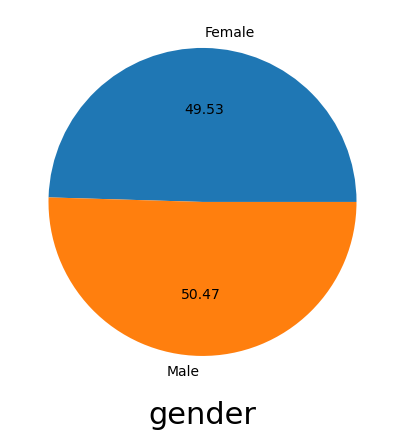

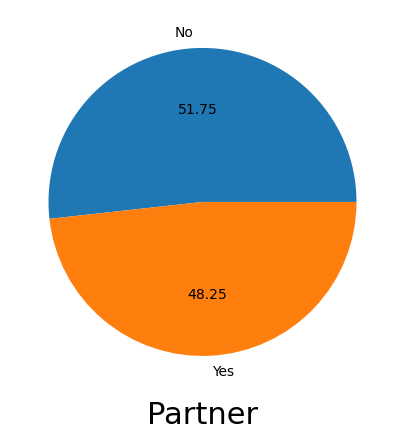

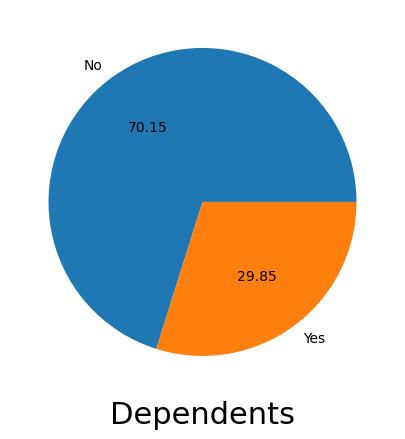

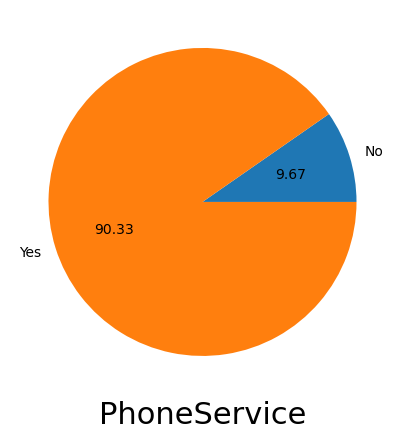

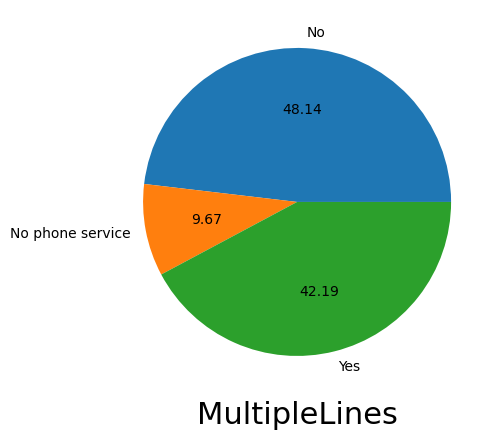

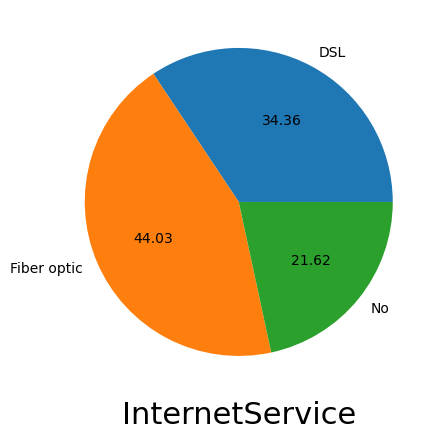

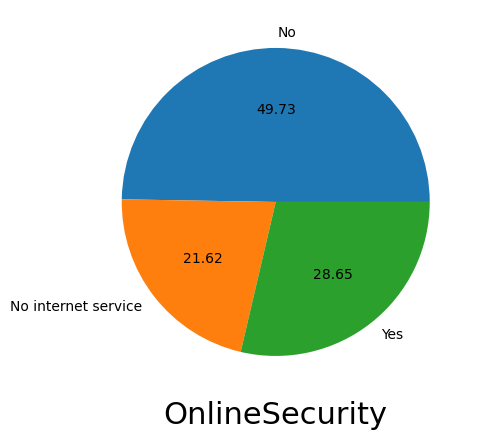

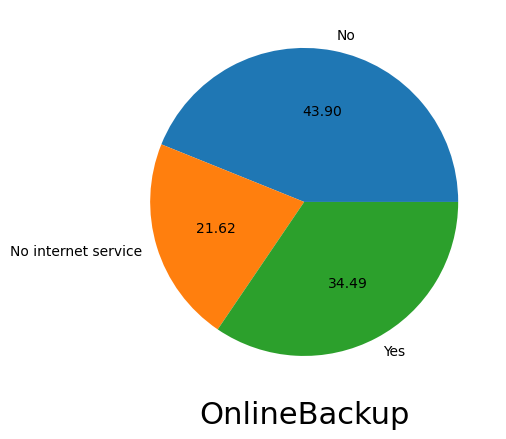

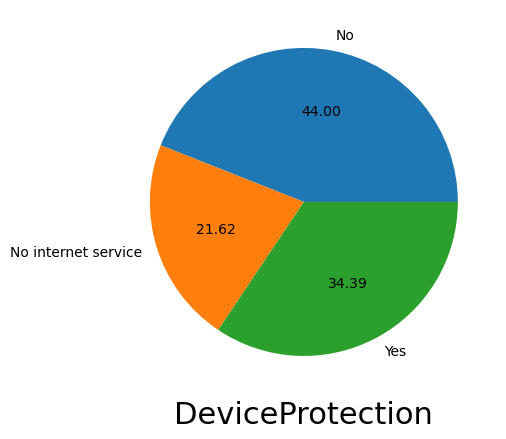

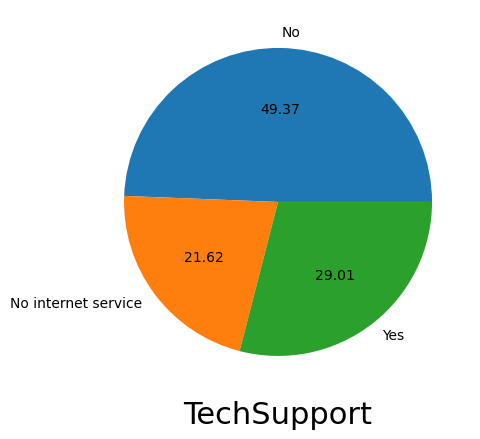

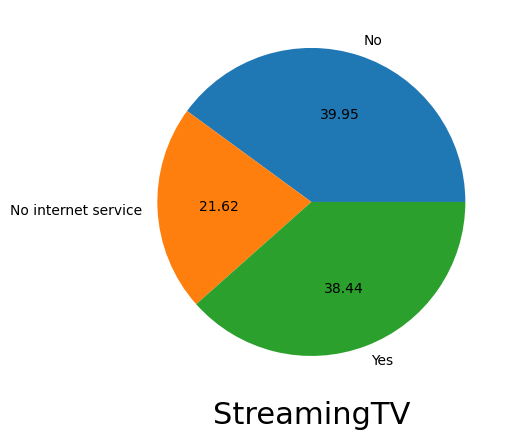

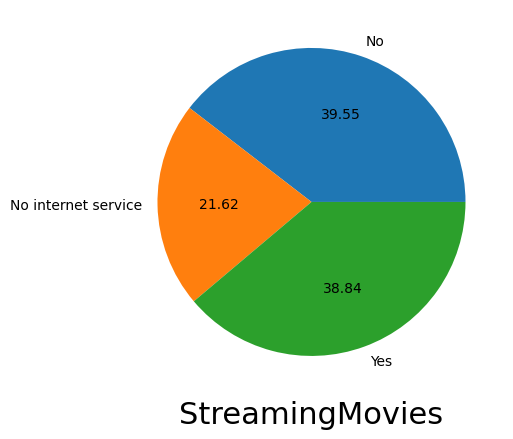

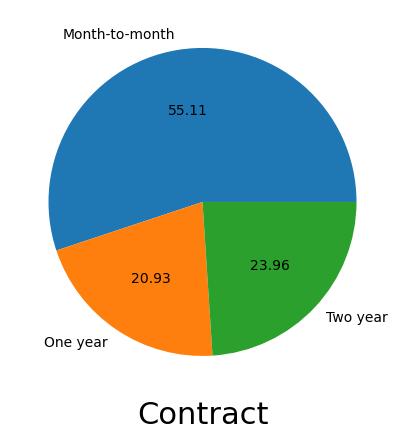

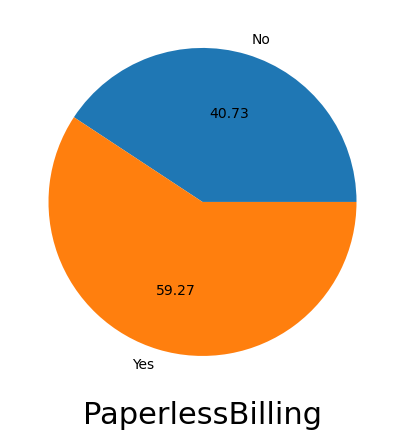

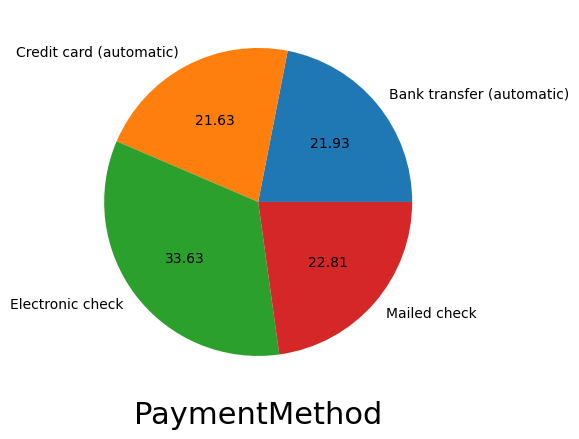

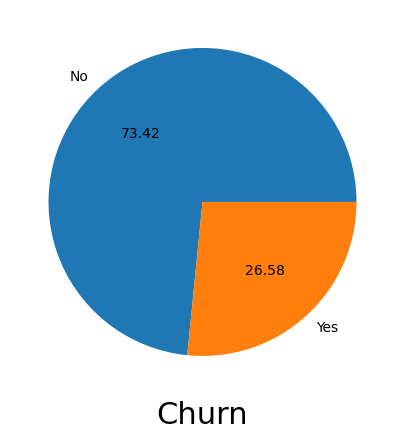

In [28]:
def Plotpie(df):
    #identifying categorical variables
    cv = tc.select_dtypes('object').columns
    #identifying unique values in categorical variable
    cvc = tc[cv].nunique()
    i = 1
    for col in cvc.index:
        fig, axs = plt.subplots(ncols = 1, figsize=(10, 5))
        plt.figure(i)
        df.groupby(col).size().plot(kind='pie', autopct='%.2f')
        axs.set_xlabel(col, size=22)
        i = i+1
    plt.show()
Plotpie(tc)

#### 2.D. Share insights for Q2.c. [2 Marks]

###### Observations: 
<li>Gender: 2 catogories "Male" and "female". Almost equally distributed.</li>
<li>Partner: 2 catogories "Yes" and "No". Almost equally distributed.</li>
<li>Dependents: 2 catogories "Yes" and "No". 70-30 distribution.</li>
<li>PhoneService:2 catogories "Yes" and "No". only 10% with no phone service. Highly skewed data.</li>
<li>Multiple Lines : 3 catogories "Yes" and "No" and "No phone Service".  "No phone Service" could be interpreted as "No".</li> 
<li>Internet Services:  3 catogories "NO internet", "DSL" and "Fiber Optics".</li>
<li>Online Services: 3 catogories "Yes" and "No" and "No Internet Service".  "No Internet Service" could be interpreted as "No".</li> 
<li>Online Backup: 3 catogories "Yes" and "No" and "No Internet Service".  "No Internet Service" could be interpreted as "No".</li>
<li>Device Protection:  3 catogories "Yes" and "No" and "No Internet Service".  "No Internet Service" could be interpreted as "No".</li>
<li>Tech Support:  3 catogories "Yes" and "No" and "No Internet Service".  "No Internet Service" could be interpreted as "No".</li>
<li>Stream TV:  3 catogories "Yes" and "No" and "No Internet Service".  "No Internet Service" could be interpreted as "No".</li>
<li>Stream Movie: 38% People Stream Movies, 62% dont.</li>
<li>Contract:  3 catogories "Month to Month" and "One Year" and "two year".</li>
<li>Paperless Billing: 2 catogories "Yes" and "No". 60-40 distribution.</li>
<li>Payment:  4 catogories "electronic Check" "mailed check""credit card" and "Bank Trnasfer".</li>
<li>Churn: 2 catogories "Yes" and "No". only 27% with Churned. impleies imbalance in the target variable.</li>

#### 2.E Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [29]:
#listing different values in catgorical variables.
cv = tc.select_dtypes('object').columns
for column in cv:
    print(tc[column].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [30]:
#Encoding all catagorical feature with lable encoding and per the analysis in Q.2.D

tc['gender'].replace(['Male','Female'],[0,1],inplace=True)
tc['Partner'].replace(['Yes','No'],[1,0],inplace=True)
tc['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
tc['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
tc['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
tc['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
tc['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
tc['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
tc['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
tc['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
tc['Churn'].replace(['Yes','No'],[1,0],inplace=True)


In [31]:
tc.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1.0,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34.0,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2.0,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45.0,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2.0,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,1,0,0,0,8.0,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.50,1
6,0,0,0,1,22.0,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,1,0,0,0,10.0,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.90,0
8,1,0,1,0,28.0,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,0,0,0,1,62.0,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


#### 2.F. Split the data into 80% train and 20% test. [1 Marks]

In [32]:
X = tc.drop(['Churn'], axis='columns')
y = tc.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape

(5625, 19)

In [33]:
X_test.shape

(1407, 19)

#### 2.G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

###### As mentioned in 2.D the target variable "Churn" is imbalanced with 73% as Churn and 27% not churened, This needs to be balanced to build  models with higher  accuracy .

In [34]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape} Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of Churned  and non churned classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7032, 19) Shape of X after SMOTE: (10326, 19)

Balance of Churned  and non churned classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=10)

## 3. Model building and performance improvement : [40 Marks]

In [36]:
def metrics_score(model,flag=True):
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

#### 3.A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )

###### Train model using decision tree

In [37]:
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
metrics_score(model_entropy)

Accuracy on training set :  0.9987893462469734
Accuracy on test set :  0.7860600193610843
Recall on training set :  0.9975615703486954
Recall on test set :  0.7824858757062146
Precision on training set :  1.0
Precision on test set :  0.7975047984644914


##### Visualizing the Decision Tree

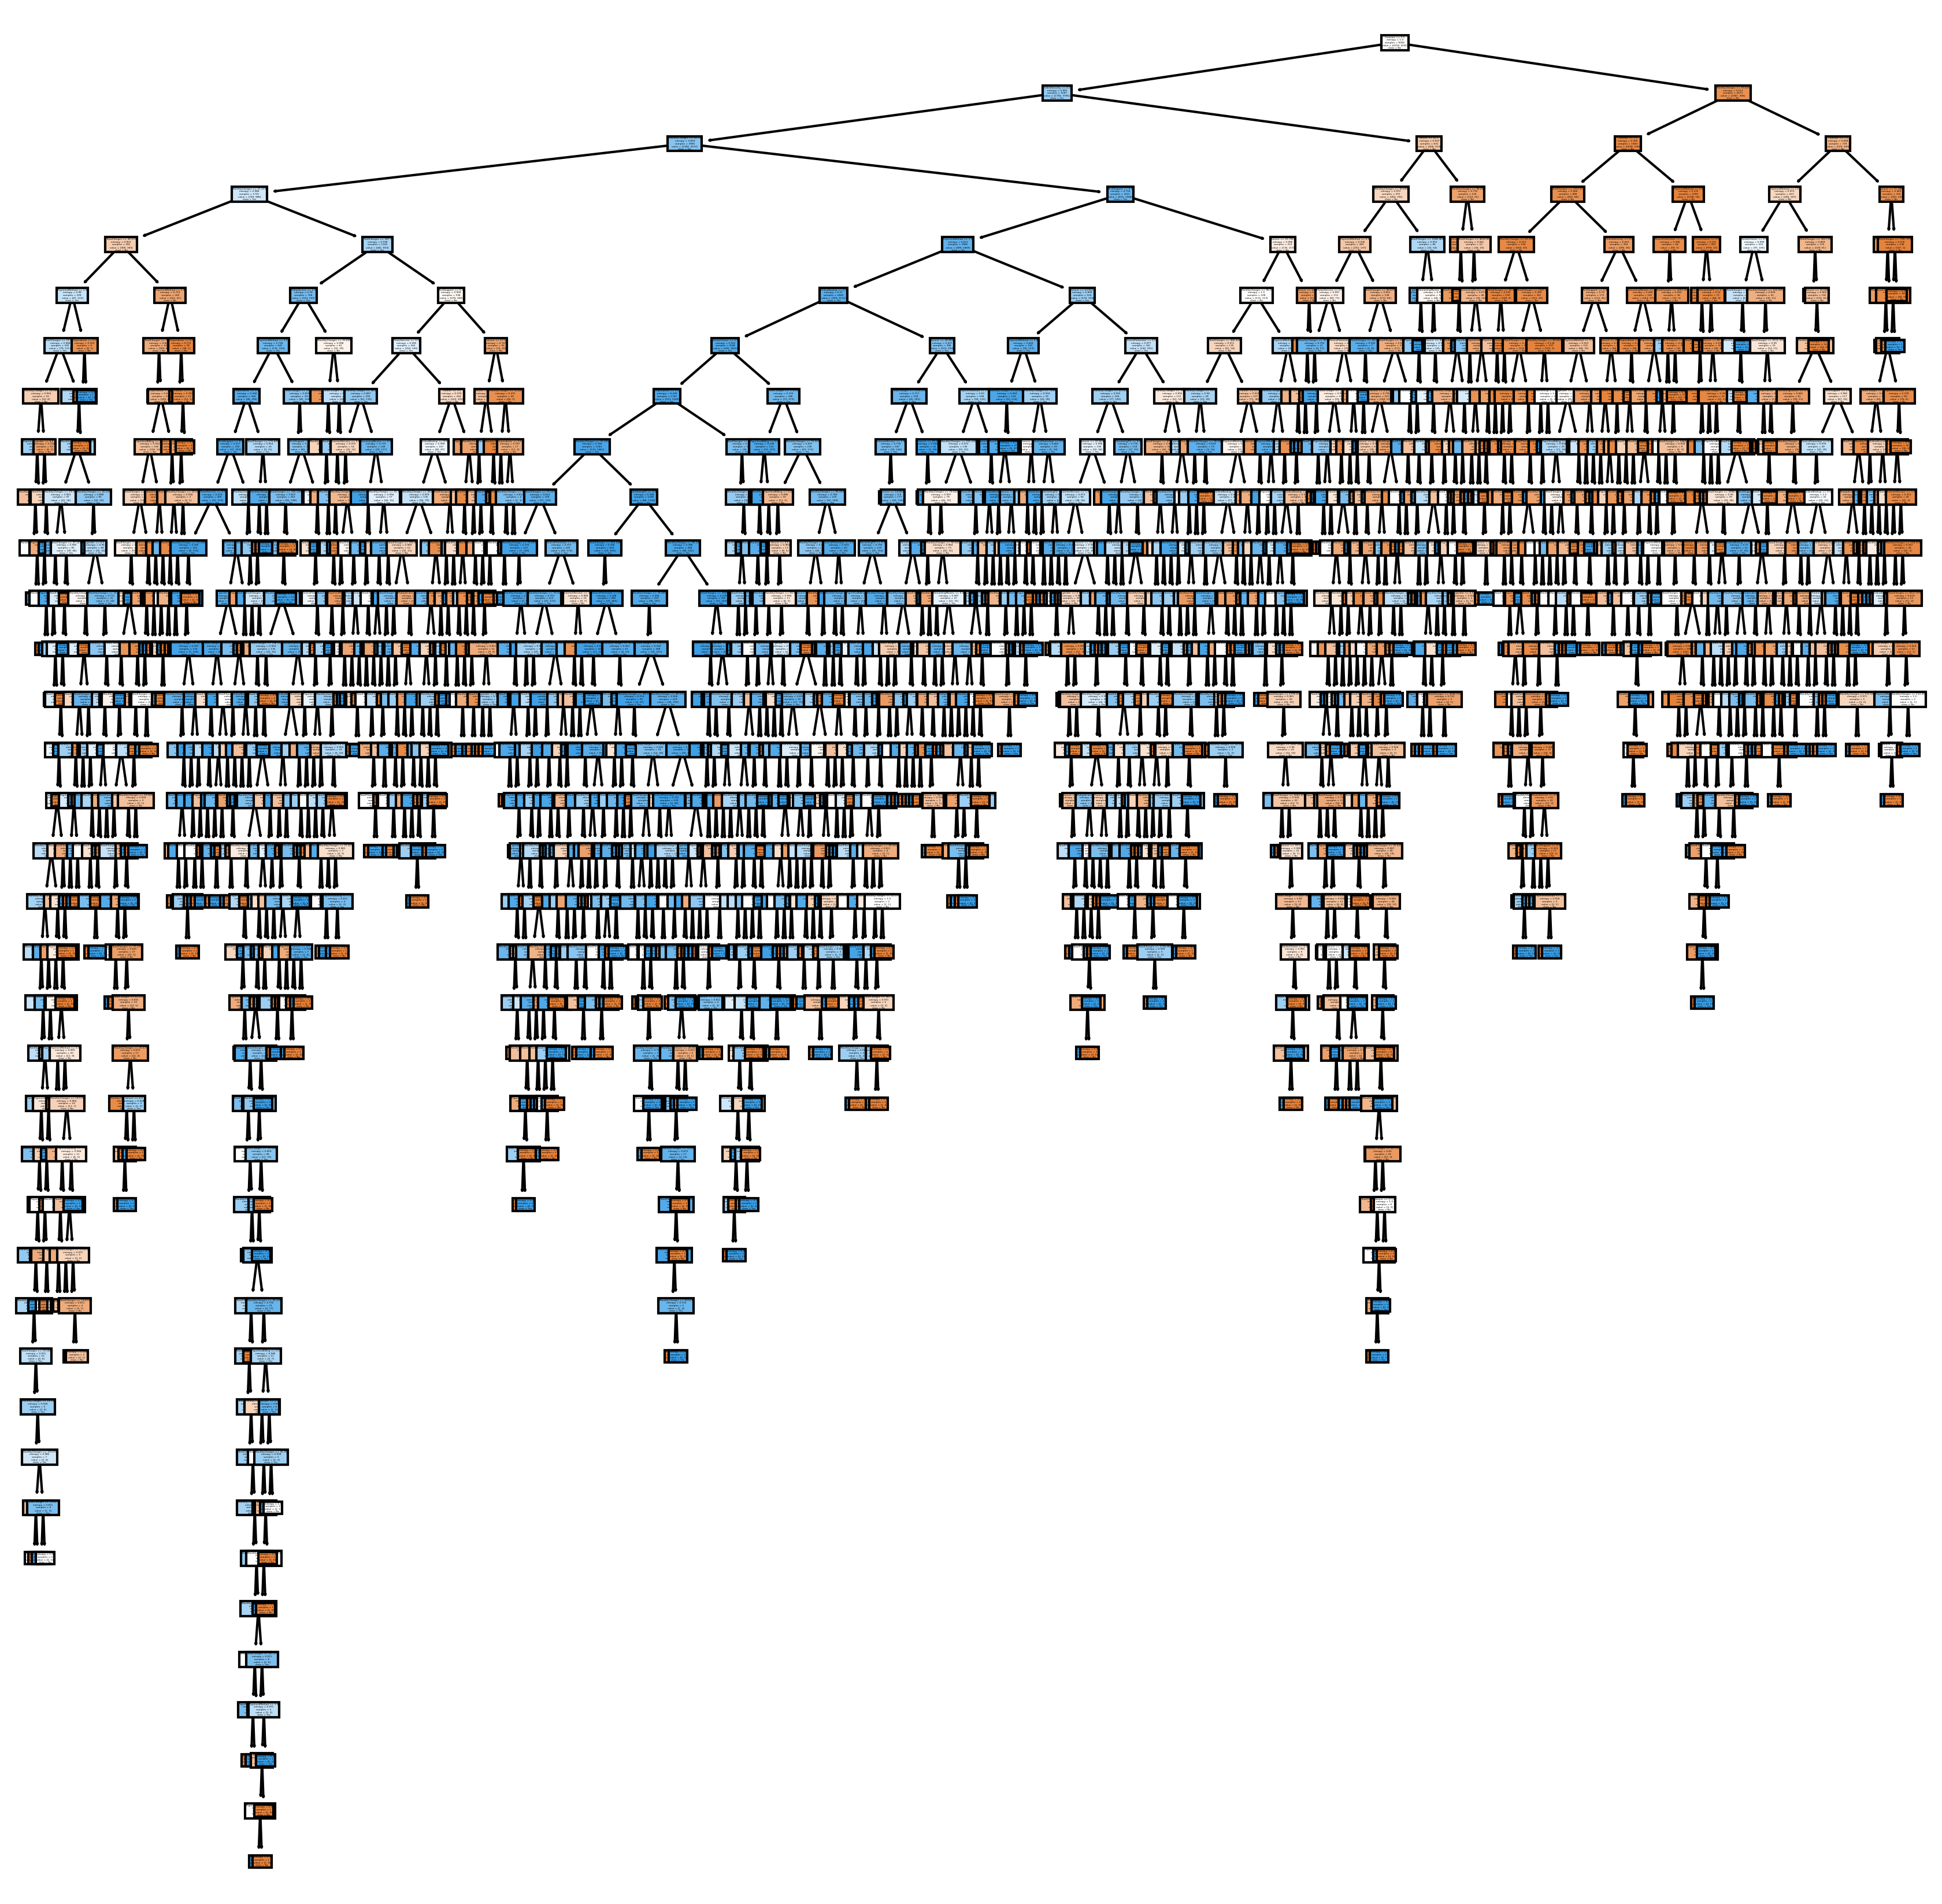

In [38]:
from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14, 14), dpi=300)
plot_tree(model_entropy, feature_names = fn, class_names=cn, filled = True)
fig.savefig('tree.png')

##### Observations:
As per the above visualisation the tree seems to be over fitting on the training data.</li>
<li>The Accurecy on the train data is 99.8%</li>
<li>The Accurecy on the test data is 78%.</li>

##### 3.B.Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b ( 5 marks) 

In [39]:
dtree_estimator = DecisionTreeClassifier(criterion= 'entropy',random_state=22)
parameters = {'max_depth': np.arange(2,10),'min_samples_leaf': [1, 2, 5, 7, 10]}
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
dtree_estimator = grid_obj.best_estimator_
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=22)

In [40]:
metrics_score(dtree_estimator)

Accuracy on training set :  0.7684019370460048
Accuracy on test set :  0.7739593417231365
Recall on training set :  0.8710070714459888
Recall on test set :  0.8700564971751412
Precision on training set :  0.7207425343018563
Precision on test set :  0.7374301675977654


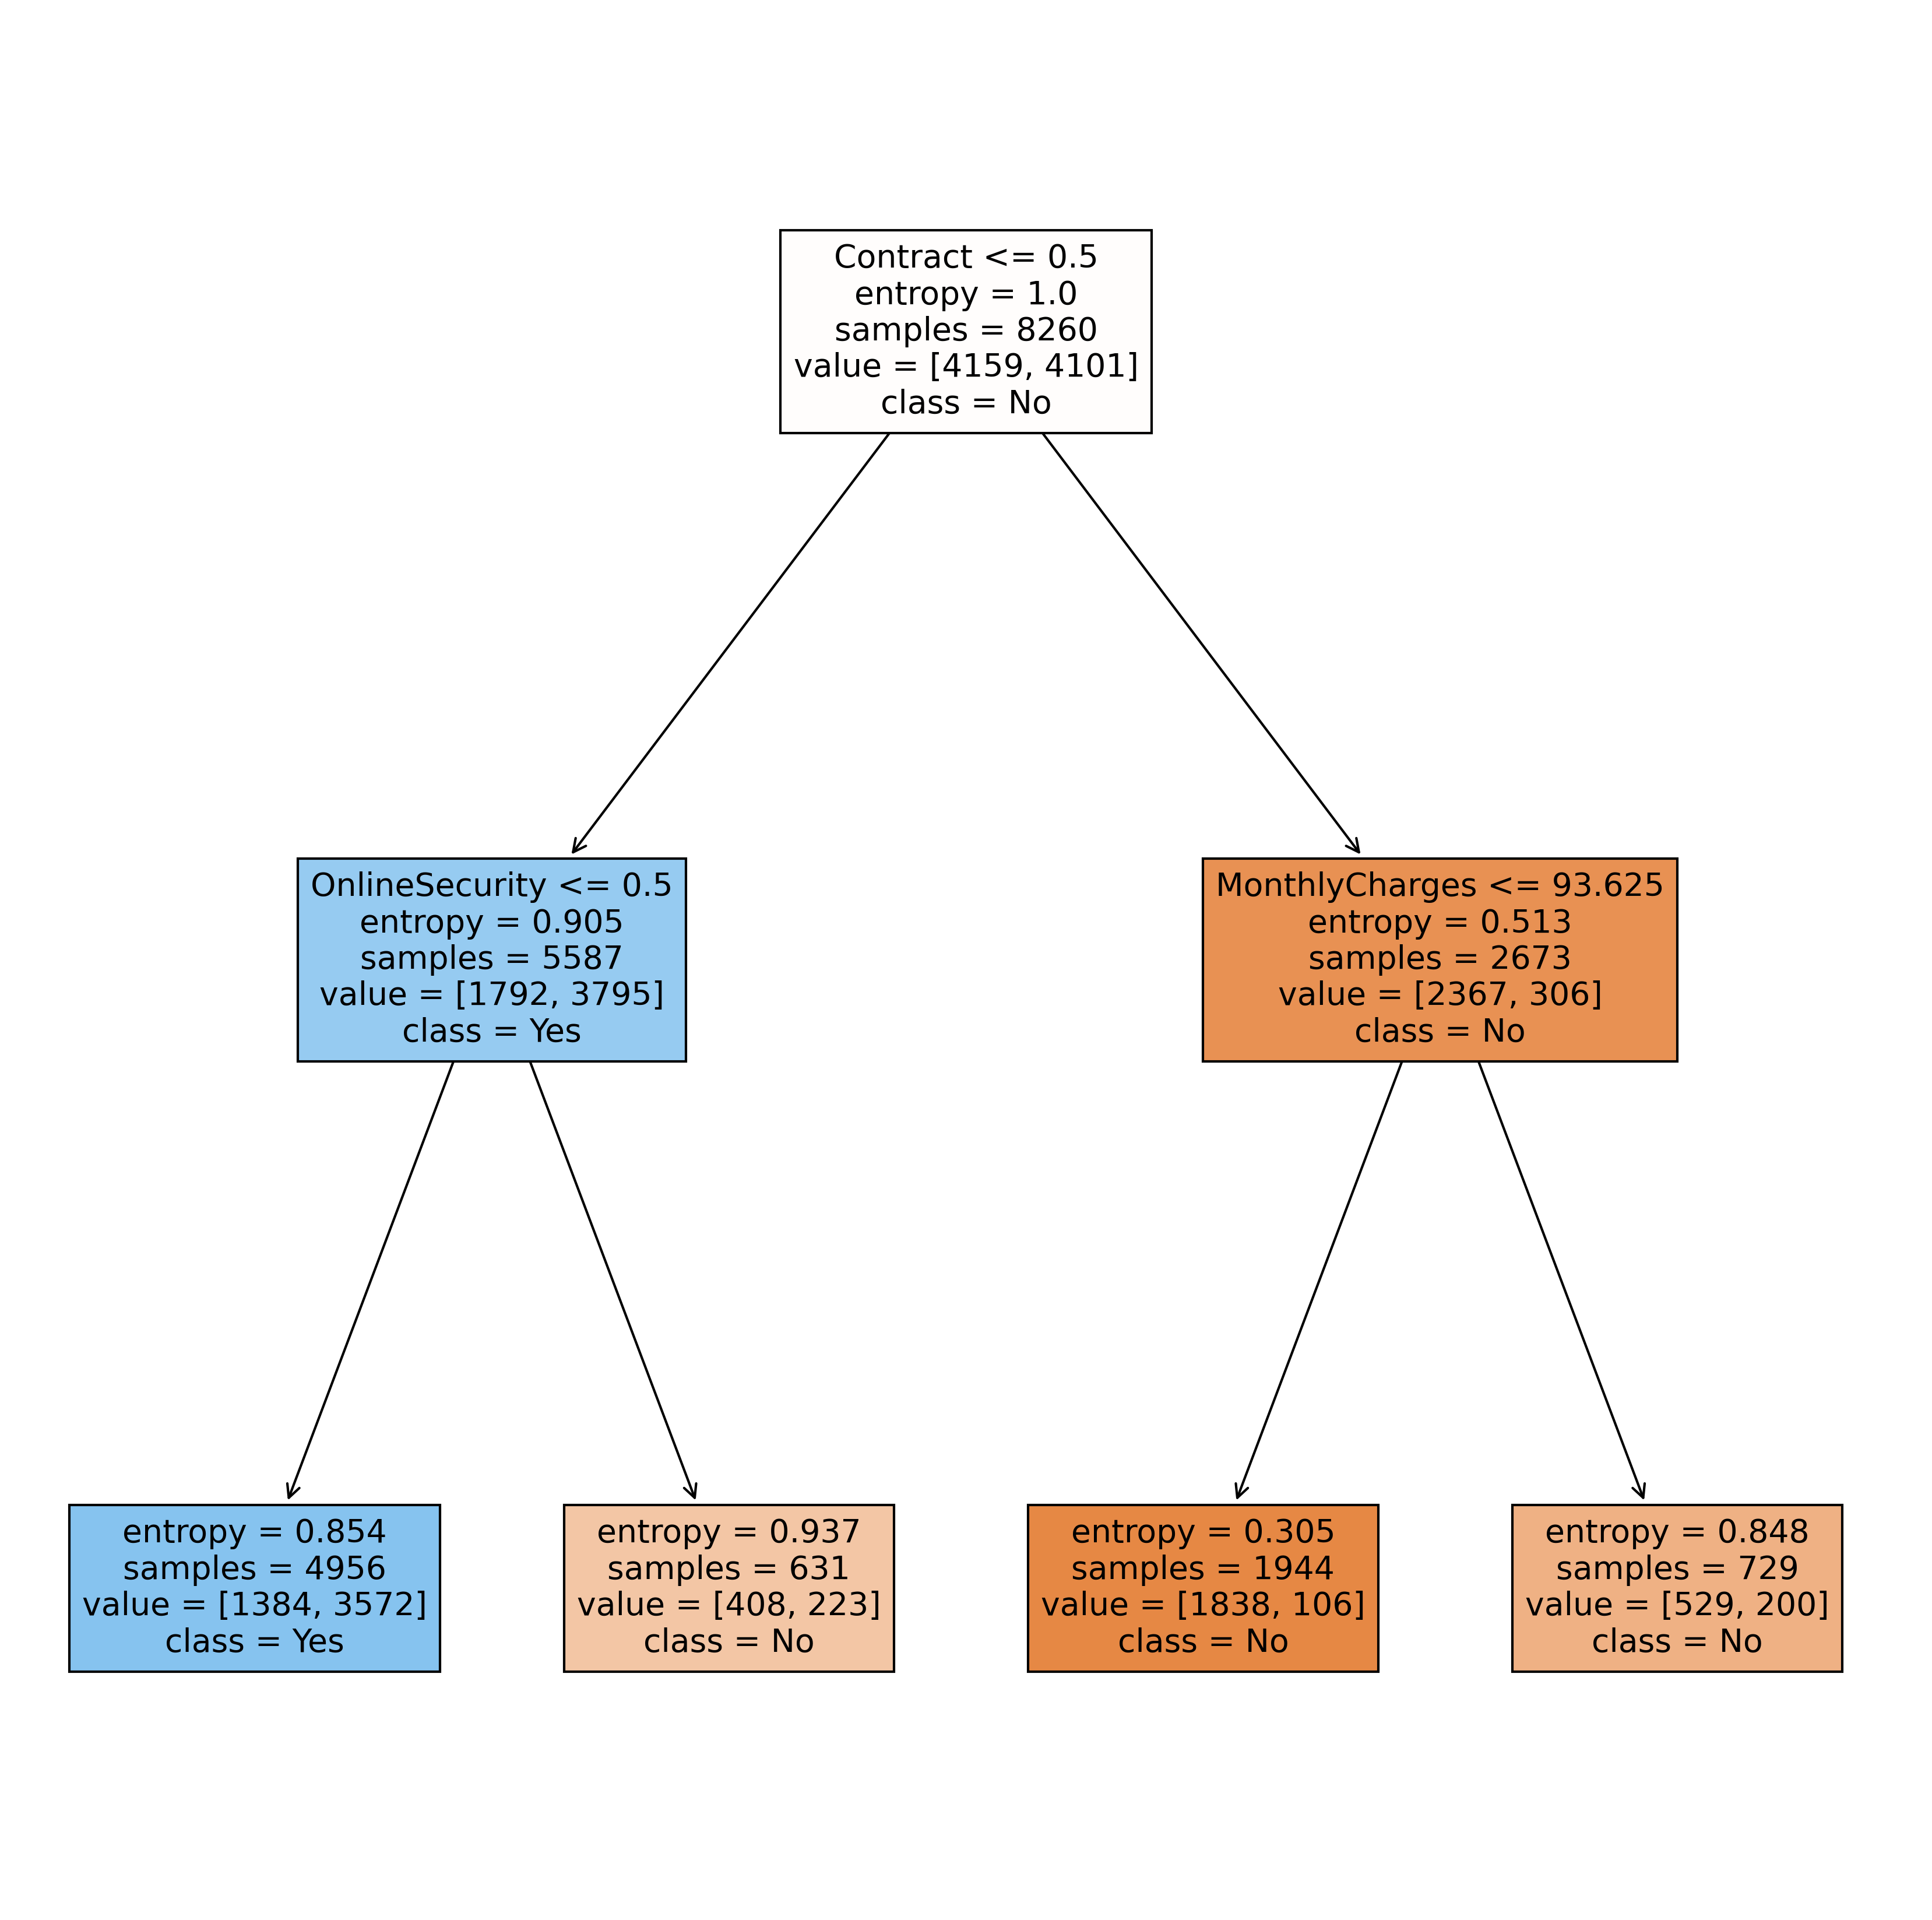

In [41]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14, 14), dpi=300)
plot_tree(dtree_estimator, feature_names = fn, class_names=cn, filled = True)
fig.savefig('tree1.png')

##### Observations:
Post hyperparameter tuning the accurecy of both training and testing data is almost 77%.</li>
<li> Max depth selected = 2
<li>The Accurecy on the train data is 76.8%</li>
<li>The Accurecy on the test data is 77.3%.</li>

##### Manually tuning the model to find better acccurescy

In [42]:
model_entropy_Tuned1=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)
model_entropy_Tuned1.fit(X_train, y_train)
metrics_score(model_entropy_Tuned1)

Accuracy on training set :  0.7684019370460048
Accuracy on test set :  0.7739593417231365
Recall on training set :  0.8710070714459888
Recall on test set :  0.8700564971751412
Precision on training set :  0.7207425343018563
Precision on test set :  0.7374301675977654


In [43]:
# changing the hyper parameter max depth to 4
model_entropy_Tuned2=DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
model_entropy_Tuned2.fit(X_train, y_train)
metrics_score(model_entropy_Tuned2)

Accuracy on training set :  0.789588377723971
Accuracy on test set :  0.7841239109390126
Recall on training set :  0.8368690563277249
Recall on test set :  0.82015065913371
Precision on training set :  0.762497222839369
Precision on test set :  0.7735346358792184


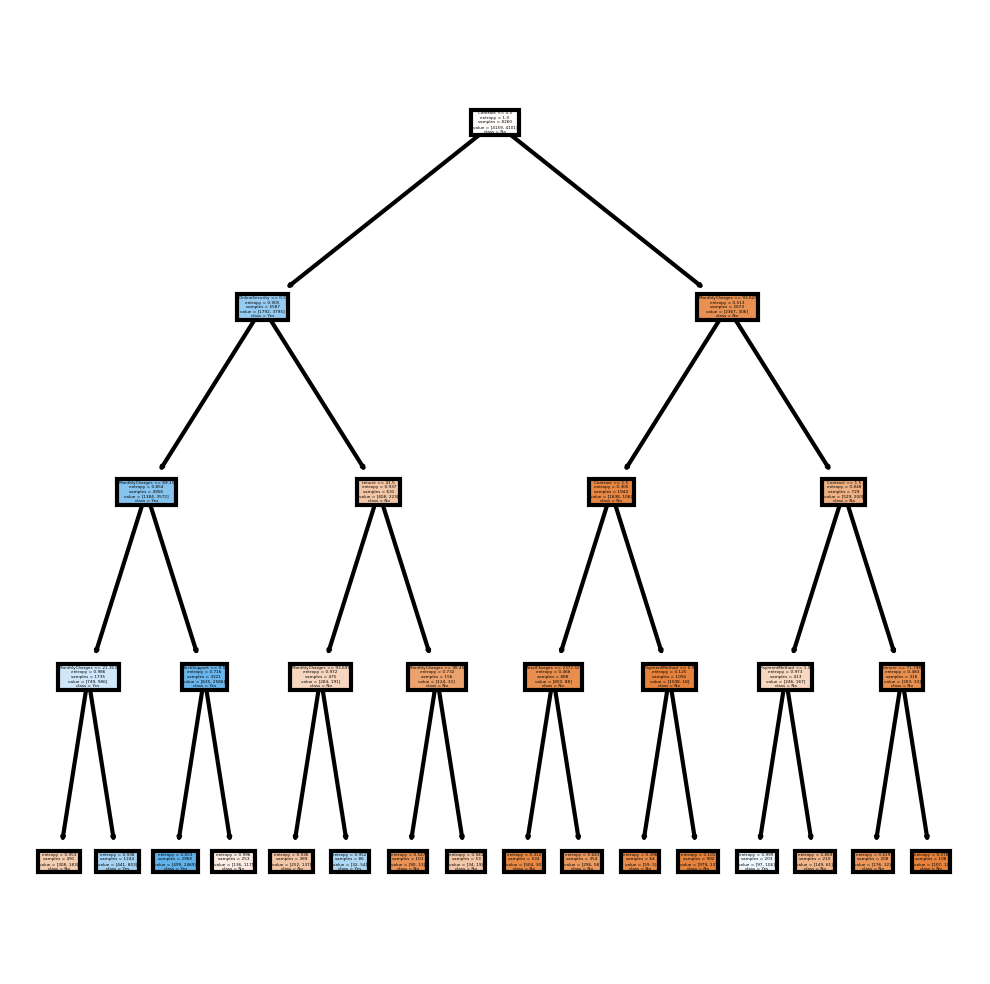

In [44]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(model_entropy_Tuned2, feature_names = fn, class_names=cn, filled = True)
fig.savefig('tune_tree1.png')

### observations:

On manual tuning the accurecy of the Model was incresed to ~78% on both training and test data.

#### 3.C. Train a model using Random forest and check the performance of the model on train and test data ( 4 marks )

In [45]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [46]:
metrics_score(rfcl)

Accuracy on training set :  0.9986682808716707
Accuracy on test set :  0.8373668925459826
Recall on training set :  0.9992684711046086
Recall on test set :  0.8314500941619586
Precision on training set :  0.9980516317584024
Precision on test set :  0.8490384615384615


##### Observations:
As per the above data seems to be over fitting on the training data.</li>
<li>The Accurecy on the train data is 99.8%</li>
<li>The Accurecy on the test data is 83%.</li>

##### 3.D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d ( 5 marks )

In [47]:
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)
parameters = {'max_depth': list(np.arange(3,9)) + [None],'min_samples_leaf': np.arange(2,5),'n_estimators': np.arange(10,60,10)}
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=40,
                       oob_score=True, random_state=1)

In [48]:
metrics_score(rf_tuned)

Accuracy on training set :  0.7917675544794189
Accuracy on test set :  0.797676669893514
Recall on training set :  0.8812484759814679
Recall on test set :  0.8775894538606404
Precision on training set :  0.7456158448524861
Precision on test set :  0.7639344262295082


##### Observations:
Post hyperparameter tuning the accurecy of both training and testing data is almost 79%.</li>
<li> Max depth selected = 3</li>
<li> Min_samples_leaf=2</li>
<li>The Accurecy on the train data is 79.1%</li>
<li>The Accurecy on the test data is 79.8%.</li>

#### 3.E.Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )

In [49]:
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [50]:
metrics_score(abcl)

Accuracy on training set :  0.8053268765133171
Accuracy on test set :  0.8097773475314618
Recall on training set :  0.8714947573762497
Recall on test set :  0.85969868173258
Precision on training set :  0.7677765843179377
Precision on test set :  0.7891097666378565


##### Observations:
As per the above the model is almost 80% accurate on both training and test data.</li>
<li>The Accurecy on the train data is 80.5%</li>
<li>The Accurecy on the test data is 80.9%.</li>


#### 3.F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f ( 5 marks )

In [51]:
abc_tuned = AdaBoostClassifier(random_state=1)
parameters = {"n_estimators": np.arange(10,50,100),"learning_rate":np.arange(0.1,0.2,0.1)}
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=1)

In [52]:
metrics_score(abc_tuned)

Accuracy on training set :  0.7460048426150121
Accuracy on test set :  0.7575024201355276
Recall on training set :  0.9253840526700805
Recall on test set :  0.931261770244821
Precision on training set :  0.6792554143547521
Precision on test set :  0.6979534227240649


##### Observations:
Post tuning the model the accurecy has gone down to ~75% both training and test data.</li>
<li>The Accurecy on the train data is 80.5%</li>
<li>The Accurecy on the test data is 80.9%.</li>
However the Recall seems to have improved.
<li>Recall on training set : 92% </li>
<li> Recall on test set :  93% </li>



#### 3.G. Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks ) 

In [53]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [54]:
metrics_score(gbcl)

Accuracy on training set :  0.8288135593220339
Accuracy on test set :  0.8165537270087125
Recall on training set :  0.8632040965618142
Recall on test set :  0.8389830508474576
Precision on training set :  0.8058274527657637
Precision on test set :  0.8107370336669699


##### Observations:
As per the above the model is almost ~82% accurate on both training and test data.</li>
<li>The Accurecy on the train data is 82.8%</li>
<li>The Accurecy on the test data is 81.6%.</li>


#### 3.H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h ( 5 marks )

In [55]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {"n_estimators": [100,150,200],"max_features":[0.7,0.8,0.9]}
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=150, random_state=1)

In [56]:
metrics_score(gbc_tuned)

Accuracy on training set :  0.8525423728813559
Accuracy on test set :  0.8320425943852856
Recall on training set :  0.8734455010972934
Recall on test set :  0.8370998116760828
Precision on training set :  0.8367203924316748
Precision on test set :  0.8363123236124177


##### Observations:
Post tuning the model the accurecy hasincreased to 85% on training and 83% test data.</li>
<li>The Accurecy on the train data is 85.25%</li>
<li>The Accurecy on the test data is 83.2%.</li>


#### 3.I. Provide detailed analysis of the below steps (4 marks ) :

##### 3.I.(1) Compare the performance of each model in train stage and test stage

In [57]:
model_bulit= {dtree_estimator,rf_tuned,abcl,gbc_tuned}
for col in model_bulit:
    print(col)
    metrics_score(col)
    print('')

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=22)
Accuracy on training set :  0.8053268765133171
Accuracy on test set :  0.8097773475314618
Recall on training set :  0.8714947573762497
Recall on test set :  0.85969868173258
Precision on training set :  0.7677765843179377
Precision on test set :  0.7891097666378565

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=40,
                       oob_score=True, random_state=1)
Accuracy on training set :  0.7917675544794189
Accuracy on test set :  0.797676669893514
Recall on training set :  0.8812484759814679
Recall on test set :  0.8775894538606404
Precision on training set :  0.7456158448524861
Precision on test set :  0.7639344262295082

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=22)
Accuracy on training set :  0.7684019370460048
Accuracy on test set :  0.7739593417231365
Recall on training set :  0.8710070714459888
Recall on test set :  0.8700564971751412
Precision on t

#### Observations
<li> Initail models seems to be over fitting for <b>Decision tree and Random forest </b></li>
<li> Post hyper tuning although the accurecy score has gone down in few modles however the recall and Precison has improved </li>

#### 3.I.(2) Provide your observation on which model performed the best

<li> <b>Gradiant boost</b> is best performning model when compared to all the other Ensemble technices used with ~85% accurecy on both testing and training data</li>

##### 3.I.(3) Provide your reasoning on why the model performed best

<li> Gradient boosting trees can be more accurate than random forests. since they are trained  correct each other’s errors, they’re capable of capturing complex patterns in the data.</li>
<li>It can prevent overfitting by using regularization techniques such as shrinkage, subsampling, and pruning.</li>

#### 3.I.(4) Provide your final conclusion on your observation

<li> The data captured was adequately filtered with a few missing values which were a bit tricky to find</li>
<li> Distribution of most of the data was nice, with some disparities.</li>
<li> The data was large in size, which helped building more models.</li>
<li> Target variable was imbalanced, which had to be balanced with SMOTE.</li>
<li> DSL Users, Without Online Security, without Online Backup, Without Tech Support, Monthly contract users, People opting Paperless Billing, People opting Electronic Payment Transfer are most likly to churn</li>
<li>We can also see that people with automatic payments are less likely to Churn, incentivising the people to join automatic payment services, can lower the Churn rate.</li>